In [1]:
%cd ..

/nfs/scistore16/edelgrp/fzimin/depth-poset


/mnt/nfs/clustersw/Debian/bookworm/jupyterhub/1.0/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os

import numpy as np
import pandas as pd
import pickle as pkl
import networkx as nx
import gudhi as gh

from src.depth import DepthPoset


#from tqdm.notebook import tqdm
from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib import cm
from networkx import draw_networkx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import lines as mlines

from src.depth import DepthPoset


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/mnt/nfs/clustersw/Debian/bookworm/jupyterhub/1.0/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/mnt/nfs/clustersw/Debian/bookworm/jupyterhub/1.0/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/mnt/nfs/clustersw/Debian/bookworm/jupyterhub/1.0/lib/python3.11/site-packages/ipykern

AttributeError: _ARRAY_API not found

# Create directory for the pics

In [3]:
path = 'raports/pics/torus scores'

if not os.path.exists(path):
    os.makedirs(path)

# Load and Format the Data

In [4]:
# define file paths
directory = "results/scores-on-barycentric-cubical-toruses"
paths = np.sort([f'{directory}/{f}' for f in os.listdir(directory)])


In [5]:
df_sizes = pd.DataFrame({'path': paths})
df_sizes['size'] = df_sizes['path'].apply(lambda path: os.path.getsize(path))

print(f"Total Size is {df_sizes['size'].sum()*1024**-3:.4f} GB.")
print(f"The distribution of sizes:\n{df_sizes['size'].describe()}")

Total Size is 0.0707 GB.
The distribution of sizes:
count    5.280000e+02
mean     1.437348e+05
std      2.832633e+05
min      2.439000e+03
25%      1.313900e+04
50%      2.006600e+04
75%      1.144528e+05
max      1.519050e+06
Name: size, dtype: float64


In [6]:

#paths = paths[pd.Series(paths).apply(lambda s: s.split('.')[0].split('/')[-1]).values > '2024-12-26 18:04:00']

# load them
ls = []
for path in tqdm(paths, total=len(paths)):
    with open(path, 'rb') as file:
        ls.append(pkl.load(file))
        ls[-1].update({'path': path})

100%|██████████| 528/528 [00:05<00:00, 90.12it/s] 


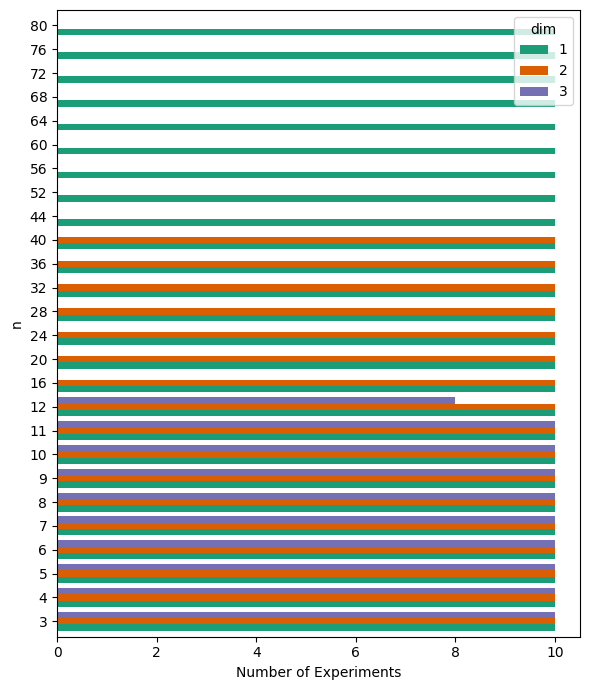

In [7]:
fig, ax = plt.subplots(figsize=(6, 7))

df_cases = pd.DataFrame(ls)
df_cases.insert(0, 'index', df_cases.index)

colors = plt.get_cmap('Dark2')(np.arange(df_cases['dim'].nunique()))

df_cases[['n', 'dim', 'depth poset']].groupby(['n', 'dim']).count().reset_index().pivot(columns='dim', index='n', values='depth poset').fillna(0).astype(int).plot(kind='barh', width=0.8, ax=ax, color=colors)
plt.xlabel('Number of Experiments')
plt.tight_layout()
plt.savefig('raports/pics/torus scores/cases.png')

In [8]:
print(f'df_cases.shape = {df_cases.shape}')
df_cases.head()

df_cases.shape = (528, 9)


index  n  dim shape                                            complex  \
0      0  4    1  (4,)  <src.complexes.CubicalTorusComplex object at 0...   
1      1  4    1  (4,)  <src.complexes.CubicalTorusComplex object at 0...   
2      2  5    1  (5,)  <src.complexes.CubicalTorusComplex object at 0...   
3      3  4    1  (4,)  <src.complexes.CubicalTorusComplex object at 0...   
4      4  4    1  (4,)  <src.complexes.CubicalTorusComplex object at 0...   

                                       depth poset  \
0  <src.depth.DepthPoset object at 0x7f7040ebc3d0>   
1  <src.depth.DepthPoset object at 0x7f6fc12e5050>   
2  <src.depth.DepthPoset object at 0x7f6fc05505d0>   
3  <src.depth.DepthPoset object at 0x7f6fc0551c50>   
4  <src.depth.DepthPoset object at 0x7f6fc12eee50>   

                                        poset scores  \
0  [{'object': 'full', 'avarage_maximal_chain': 1...   
1  [{'object': 'full', 'avarage_maximal_chain': 1...   
2  [{'object': 'full', 'avarage_maximal_chain': 1...   
3  [{'object': 'full', 'avarage_maximal_chain': 1...   
4  [{'object': 'full', 'avarage_maximal_chain': 1...   

                                         node scores  \
0  [{'object': 'full', 'node': (0,),((0,),(1,)), ...   
1  [{'object': 'full', 'node': (1,),((1,),(2,)), ...   
2  [{'object': 'full', 'node': (2,),((1,),(2,)), ...   
3  [{'object': 'full', 'node': (0,),((2,),(3,)), ...   
4  [{'object': 'full', 'node': (0,),((3,),(0,)), ...   

                                                path  
0  results/scores-on-barycentric-cubical-toruses/...  
1  results/scores-on-barycentric-cubical-toruses/...  
2  results/scores-on-barycentric-cubical-toruses/...  
3  results/scores-on-barycentric-cubical-toruses/...  
4  results/scores-on-barycentric-cubical-toruses/...

## Geting pairs for homotopies

In [9]:
import itertools

In [10]:
max_pairs = 30

pairs = df_cases.groupby(['dim', 'shape'])['path'].agg(lambda l: np.array(list(itertools.combinations(l, 2))))
pairs = pairs.apply(lambda l: l if len(l) <= max_pairs else l[np.sort(np.random.choice(np.arange(len(l)), max_pairs, replace=False))])
pairs = np.concatenate([p for p in pairs.values if len(p) > 0])

print(f'pairs.shape = {pairs.shape}')
pairs[:5]

pairs.shape = (1588, 2)


array([['results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877695.pkl',
        'results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877722.pkl'],
       ['results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877695.pkl',
        'results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877886.pkl'],
       ['results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877695.pkl',
        'results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877900.pkl'],
       ['results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877695.pkl',
        'results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.883683.pkl'],
       ['results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.877695.pkl',
        'results/scores-on-barycentric-cubical-toruses/2025-06-18 16:08:54.886476.pkl']],
      dtype='<U76')

In [11]:
s = '\n'.join([f'"{f0}" "{f1}"' for f0, f1 in pairs]) + '\n'
#print(s)

# The example of the filtration $f: \mathbb{T}^2\to\mathbb{R}$

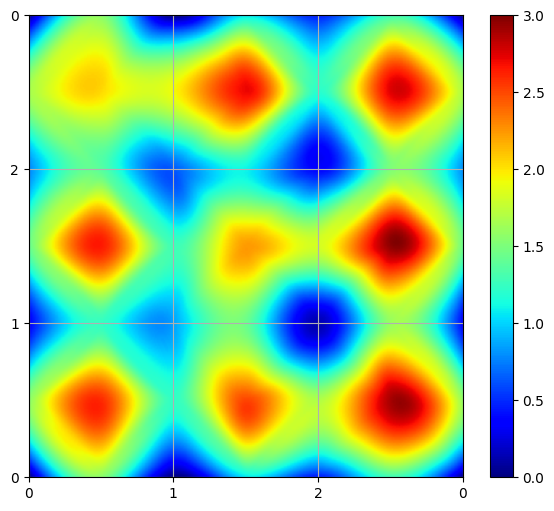

In [12]:
ctc = np.random.choice(df_cases[(df_cases['dim'] == 2)&(df_cases['n'] <= 6)]['complex'])
n = ctc.shape[0]

fig, ax = plt.subplots(figsize=(7, 6))

sm = ctc.draw_gradiental(ax=ax, vmin=0, vmax=3)
plt.colorbar(sm, ax=ax)

ax.set_xticks(np.arange(n + 1), np.arange(n + 1)%n)
ax.set_yticks(np.arange(n + 1), np.arange(n + 1)%n)
ax.grid(True)

plt.savefig('raports/pics/torus scores/2d-example.png')

# Plot Poset Scores

In [13]:
restore_poset_scores = False

In [14]:
cmap = plt.get_cmap('Dark2')

In [15]:
from src import poset_scores

In [16]:
df_poset_scores = [pd.DataFrame(i['poset scores']) for i in ls]
for i in range(len(df_poset_scores)):
    df_poset_scores[i].insert(0, 'index', value=i)
df_poset_scores = pd.concat(df_poset_scores)

df_poset_scores = df_cases[['index', 'n', 'dim']].join(df_poset_scores.set_index('index'), on='index')
df_poset_scores = df_poset_scores.reset_index(drop=True)

print(f'df_poset_scores.shape = {df_poset_scores.shape}')
df_poset_scores.head(12)

df_poset_scores.shape = (4266, 16)


index  n  dim                           object  avarage_maximal_chain  \
0       0  4    1                             full                    1.0   
1       0  4    1                   subposet dim=0                    1.0   
2       0  4    1                 column reduction                    1.0   
3       0  4    1  column reduction subposet dim=0                    1.0   
4       0  4    1                    row reduction                    1.0   
5       0  4    1     row reduction subposet dim=0                    1.0   
6       1  4    1                             full                    1.5   
7       1  4    1                   subposet dim=0                    1.5   
8       1  4    1                 column reduction                    1.0   
9       1  4    1  column reduction subposet dim=0                    1.0   
10      1  4    1                    row reduction                    1.5   
11      1  4    1     row reduction subposet dim=0                    1.5   

    cycles_dimension  height  minimum_maximal_chain  number_of_components  \
0                0.0       0                    1.0                     3   
1                0.0       0                    1.0                     3   
2                0.0       0                    1.0                     3   
3                0.0       0                    1.0                     3   
4                0.0       0                    1.0                     3   
5                0.0       0                    1.0                     3   
6                0.0       1                    1.0                     2   
7                0.0       1                    1.0                     2   
8                0.0       0                    1.0                     3   
9                0.0       0                    1.0                     3   
10               0.0       1                    1.0                     2   
11               0.0       1                    1.0                     2   

    number_of_edges_in_closure  number_of_edges_in_reduction  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   
5                            0                             0   
6                            1                             1   
7                            1                             1   
8                            0                             0   
9                            0                             0   
10                           1                             1   
11                           1                             1   

    number_of_maximal_nodes  number_of_minimal_nodes  number_of_nodes  \
0                         3                        3                3   
1                         3                        3                3   
2                         3                        3                3   
3                         3                        3                3   
4                         3                        3                3   
5                         3                        3                3   
6                         2                        2                3   
7                         2                        2                3   
8                         3                        3                3   
9                         3                        3                3   
10                        2                        2                3   
11                        2                        2                3   

    number_of_relations  width  
0                     0      3  
1                     0      3  
2                     0      3  
3                     0      3  
4                     0      3  
5                  

In [17]:
interesting_poset_scores = [poset_scores.number_of_nodes, 
                            poset_scores.number_of_relations, 
                            poset_scores.number_of_components, 
                            poset_scores.cycles_dimension, # not in the second compute
                            poset_scores.number_of_minimal_nodes, 
                            poset_scores.number_of_maximal_nodes, 
                            poset_scores.height, 
                            poset_scores.width, 
                            poset_scores.minimum_maximal_chain, # not in the second compute
                            poset_scores.avarage_maximal_chain, # not in the second compute
                           ]
interesting_poset_scores_names = [score.__name__ for score in interesting_poset_scores]

for score in interesting_poset_scores:
    if not (score.__name__ in df_poset_scores.columns):
        df_poset_scores[score.__name__] = np.nan

if restore_poset_scores:
    missed_values = df_poset_scores[[score.__name__ for score in interesting_poset_scores]].isna().sum().sum()
    print(f'There are {missed_values} values missed and should be restored.')
    
    with tqdm(total=missed_values) as pbar:
        for i in df_poset_scores[df_poset_scores[interesting_poset_scores_names].isna().any(axis=1)].index:
            if df_poset_scores.loc[i, interesting_poset_scores_names].isna().any():
                dp = df_cases.loc[df_cases['index'] == df_poset_scores.loc[i, 'index'], 'depth poset'].values[0]
                if df_poset_scores.loc[i, 'object'] != 'full':
                    dim = int(df_poset_scores.loc[i, 'object'].replace('subposet dim=', ''))
                    dp = dp.subposet_dim(dim)
                for score in interesting_poset_scores:
                    if pd.isna(df_poset_scores.loc[i, score.__name__]):
                        df_poset_scores.loc[i, score.__name__] = score(dp)
                        pbar.update()
        
print(f'df_poset_scores.shape = {df_poset_scores.shape}')
df_poset_scores.head()

df_poset_scores.shape = (4266, 16)


index  n  dim                           object  avarage_maximal_chain  \
0      0  4    1                             full                    1.0   
1      0  4    1                   subposet dim=0                    1.0   
2      0  4    1                 column reduction                    1.0   
3      0  4    1  column reduction subposet dim=0                    1.0   
4      0  4    1                    row reduction                    1.0   

   cycles_dimension  height  minimum_maximal_chain  number_of_components  \
0               0.0       0                    1.0                     3   
1               0.0       0                    1.0                     3   
2               0.0       0                    1.0                     3   
3               0.0       0                    1.0                     3   
4               0.0       0                    1.0                     3   

   number_of_edges_in_closure  number_of_edges_in_reduction  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   number_of_maximal_nodes  number_of_minimal_nodes  number_of_nodes  \
0                        3                        3                3   
1                        3                        3                3   
2                        3                        3                3   
3                        3                        3                3   
4                        3                        3                3   

   number_of_relations  width  
0                    0      3  
1                    0      3  
2                    0      3  
3                    0      3  
4                    0      3

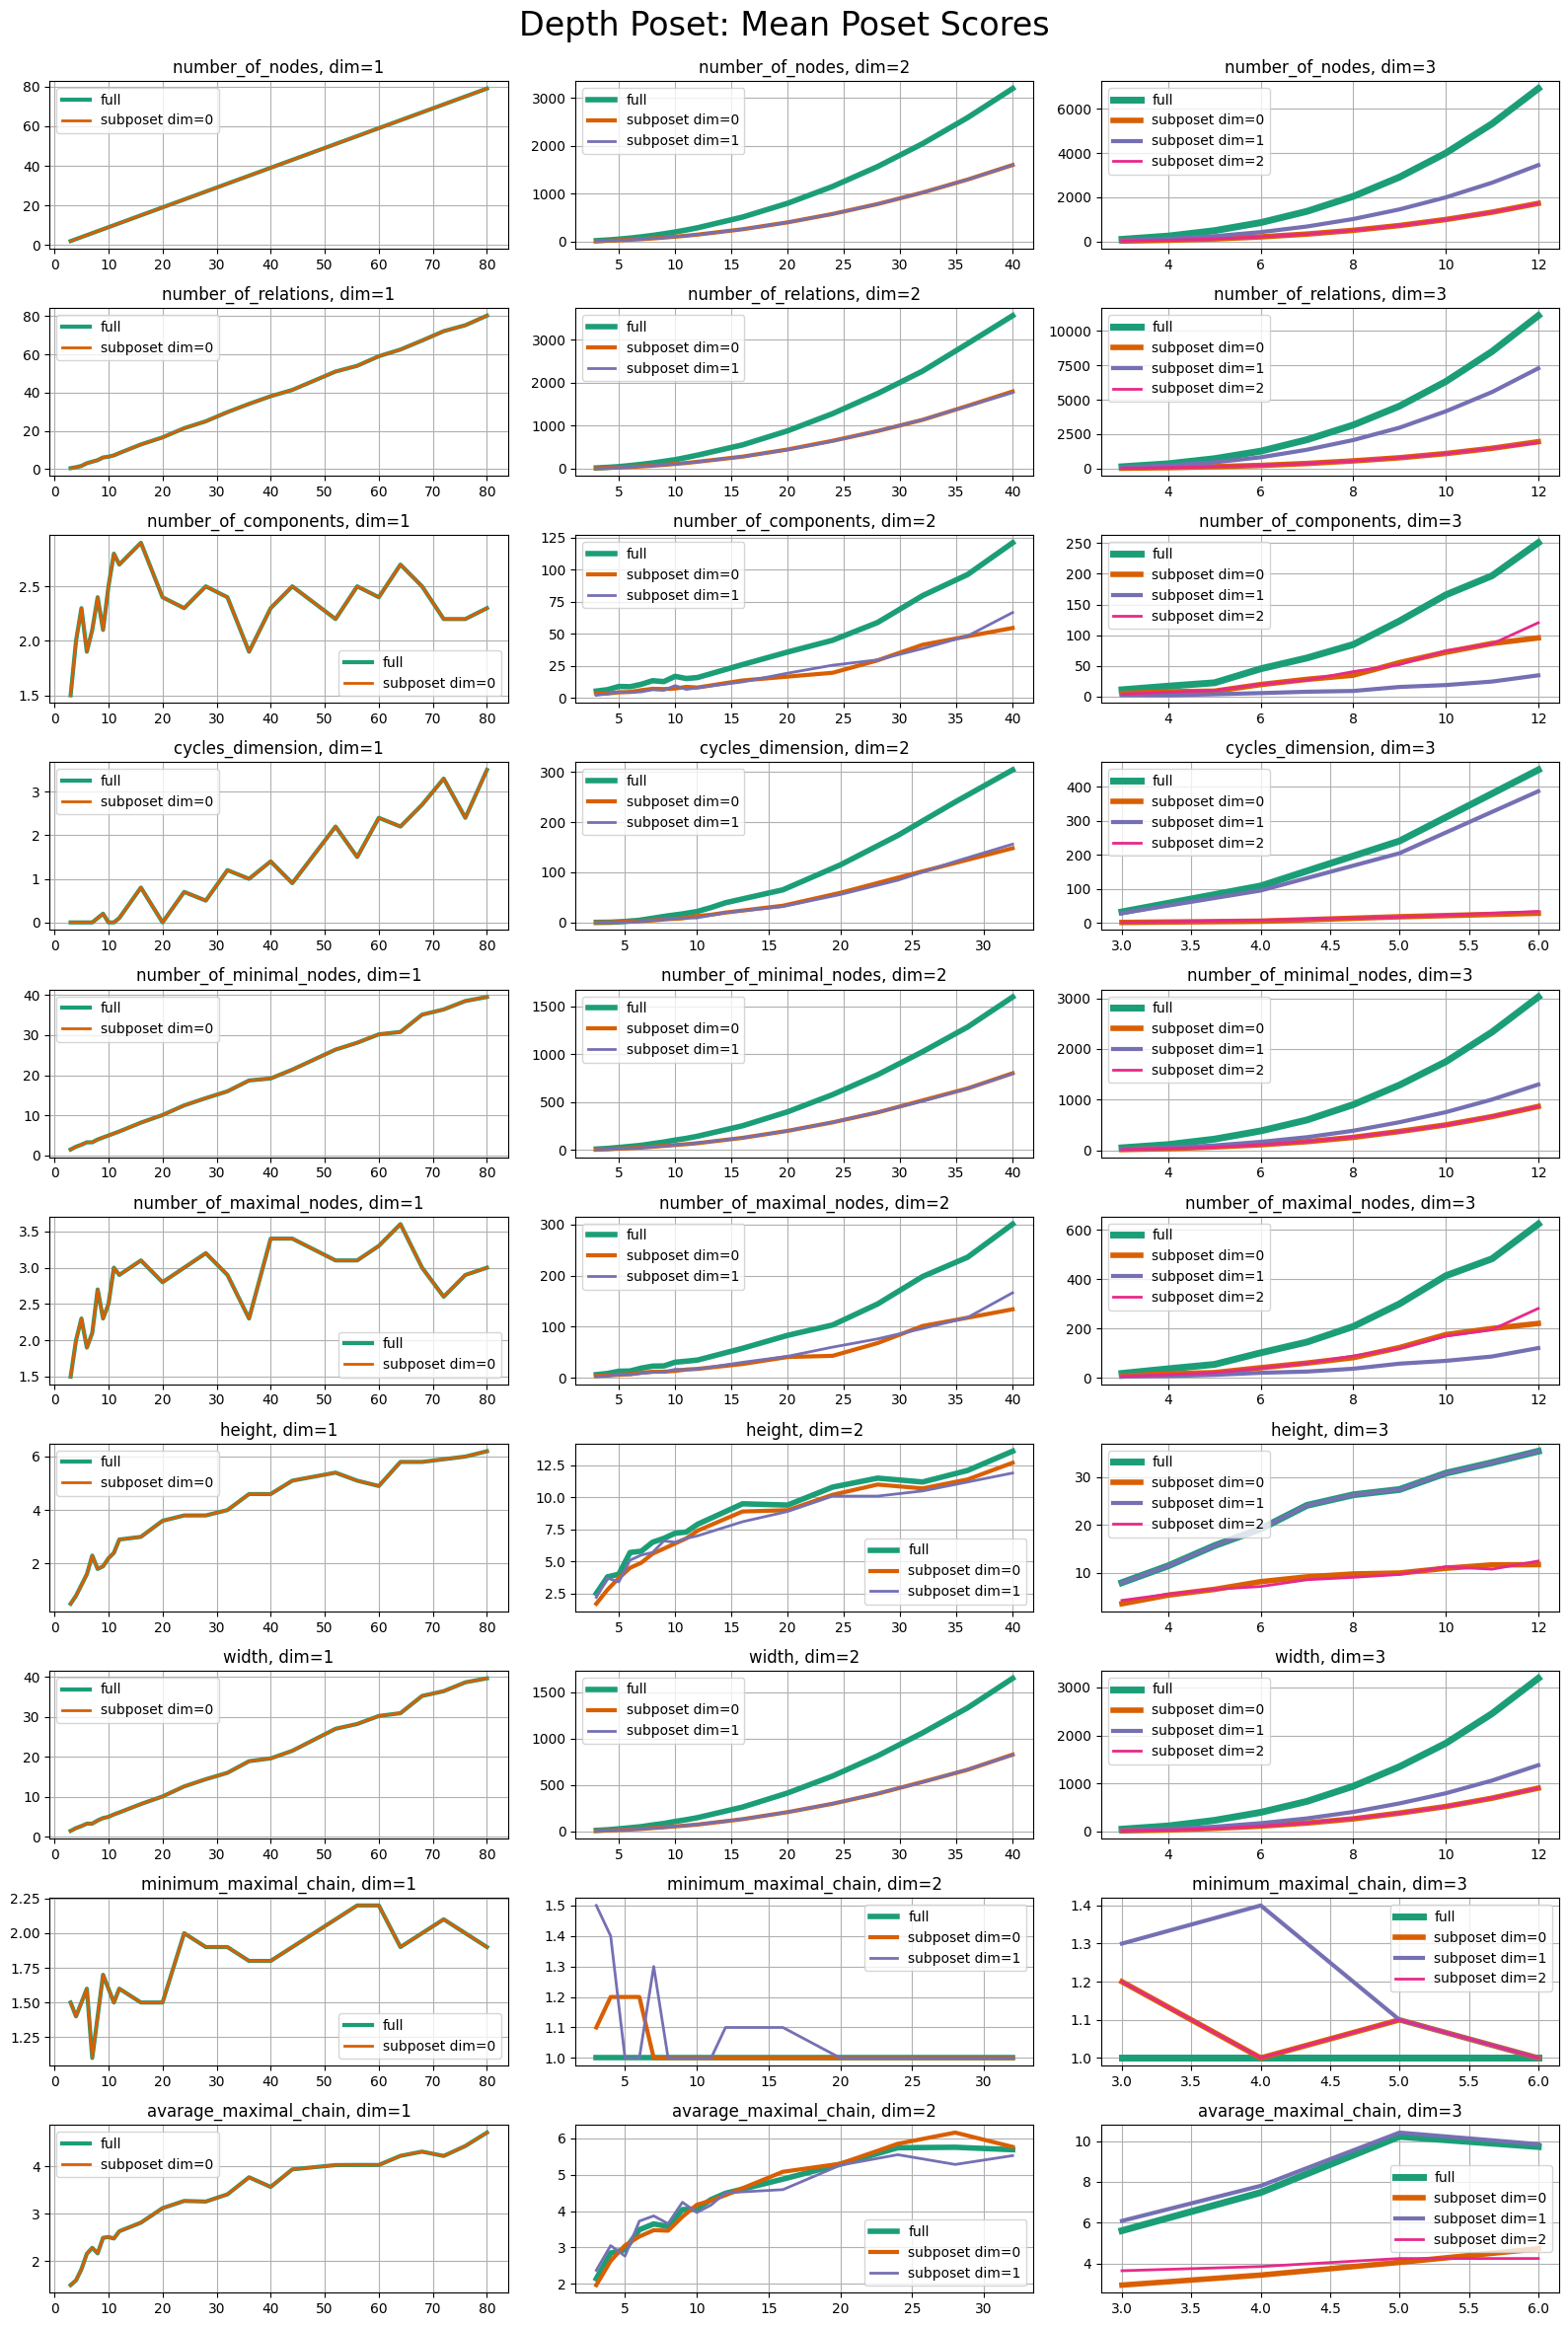

In [18]:
score_cols = interesting_poset_scores_names
max_dim = df_poset_scores['dim'].max()

fig, axs = plt.subplots(len(score_cols), max_dim)

# define the dataframe with interesting objects
objects = ['full'] + [f'subposet dim={dim}' for dim in range(max_dim + 1)]
df_objects = df_poset_scores[df_poset_scores['object'].isin(objects)]

fig.suptitle('Depth Poset: Mean Poset Scores', fontsize=24)
fig.set_figwidth(16)
fig.set_figheight(24)

for iscore, score in enumerate(score_cols):
    for dim in range(1, max_dim + 1):
        title = f'{score}, dim={dim}'
        axs[iscore, dim - 1].set_title(title)
        #df_use = df_poset_scores[df_poset_scores['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean().reset_index().pivot(columns='object', index='n', values=score)
        df_use = df_objects[df_objects['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean().reset_index().pivot(columns='object', index='n', values=score)
        for icol, col in enumerate(df_use.columns):
            axs[iscore, dim - 1].plot(df_use.index, df_use[col], label=col, linewidth=(len(df_use.columns) + 1 - icol), color=cmap(icol))
        axs[iscore, dim - 1].legend()
        axs[iscore, dim - 1].grid(True)
        
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.savefig('raports/pics/torus scores/mean poset scores.png')

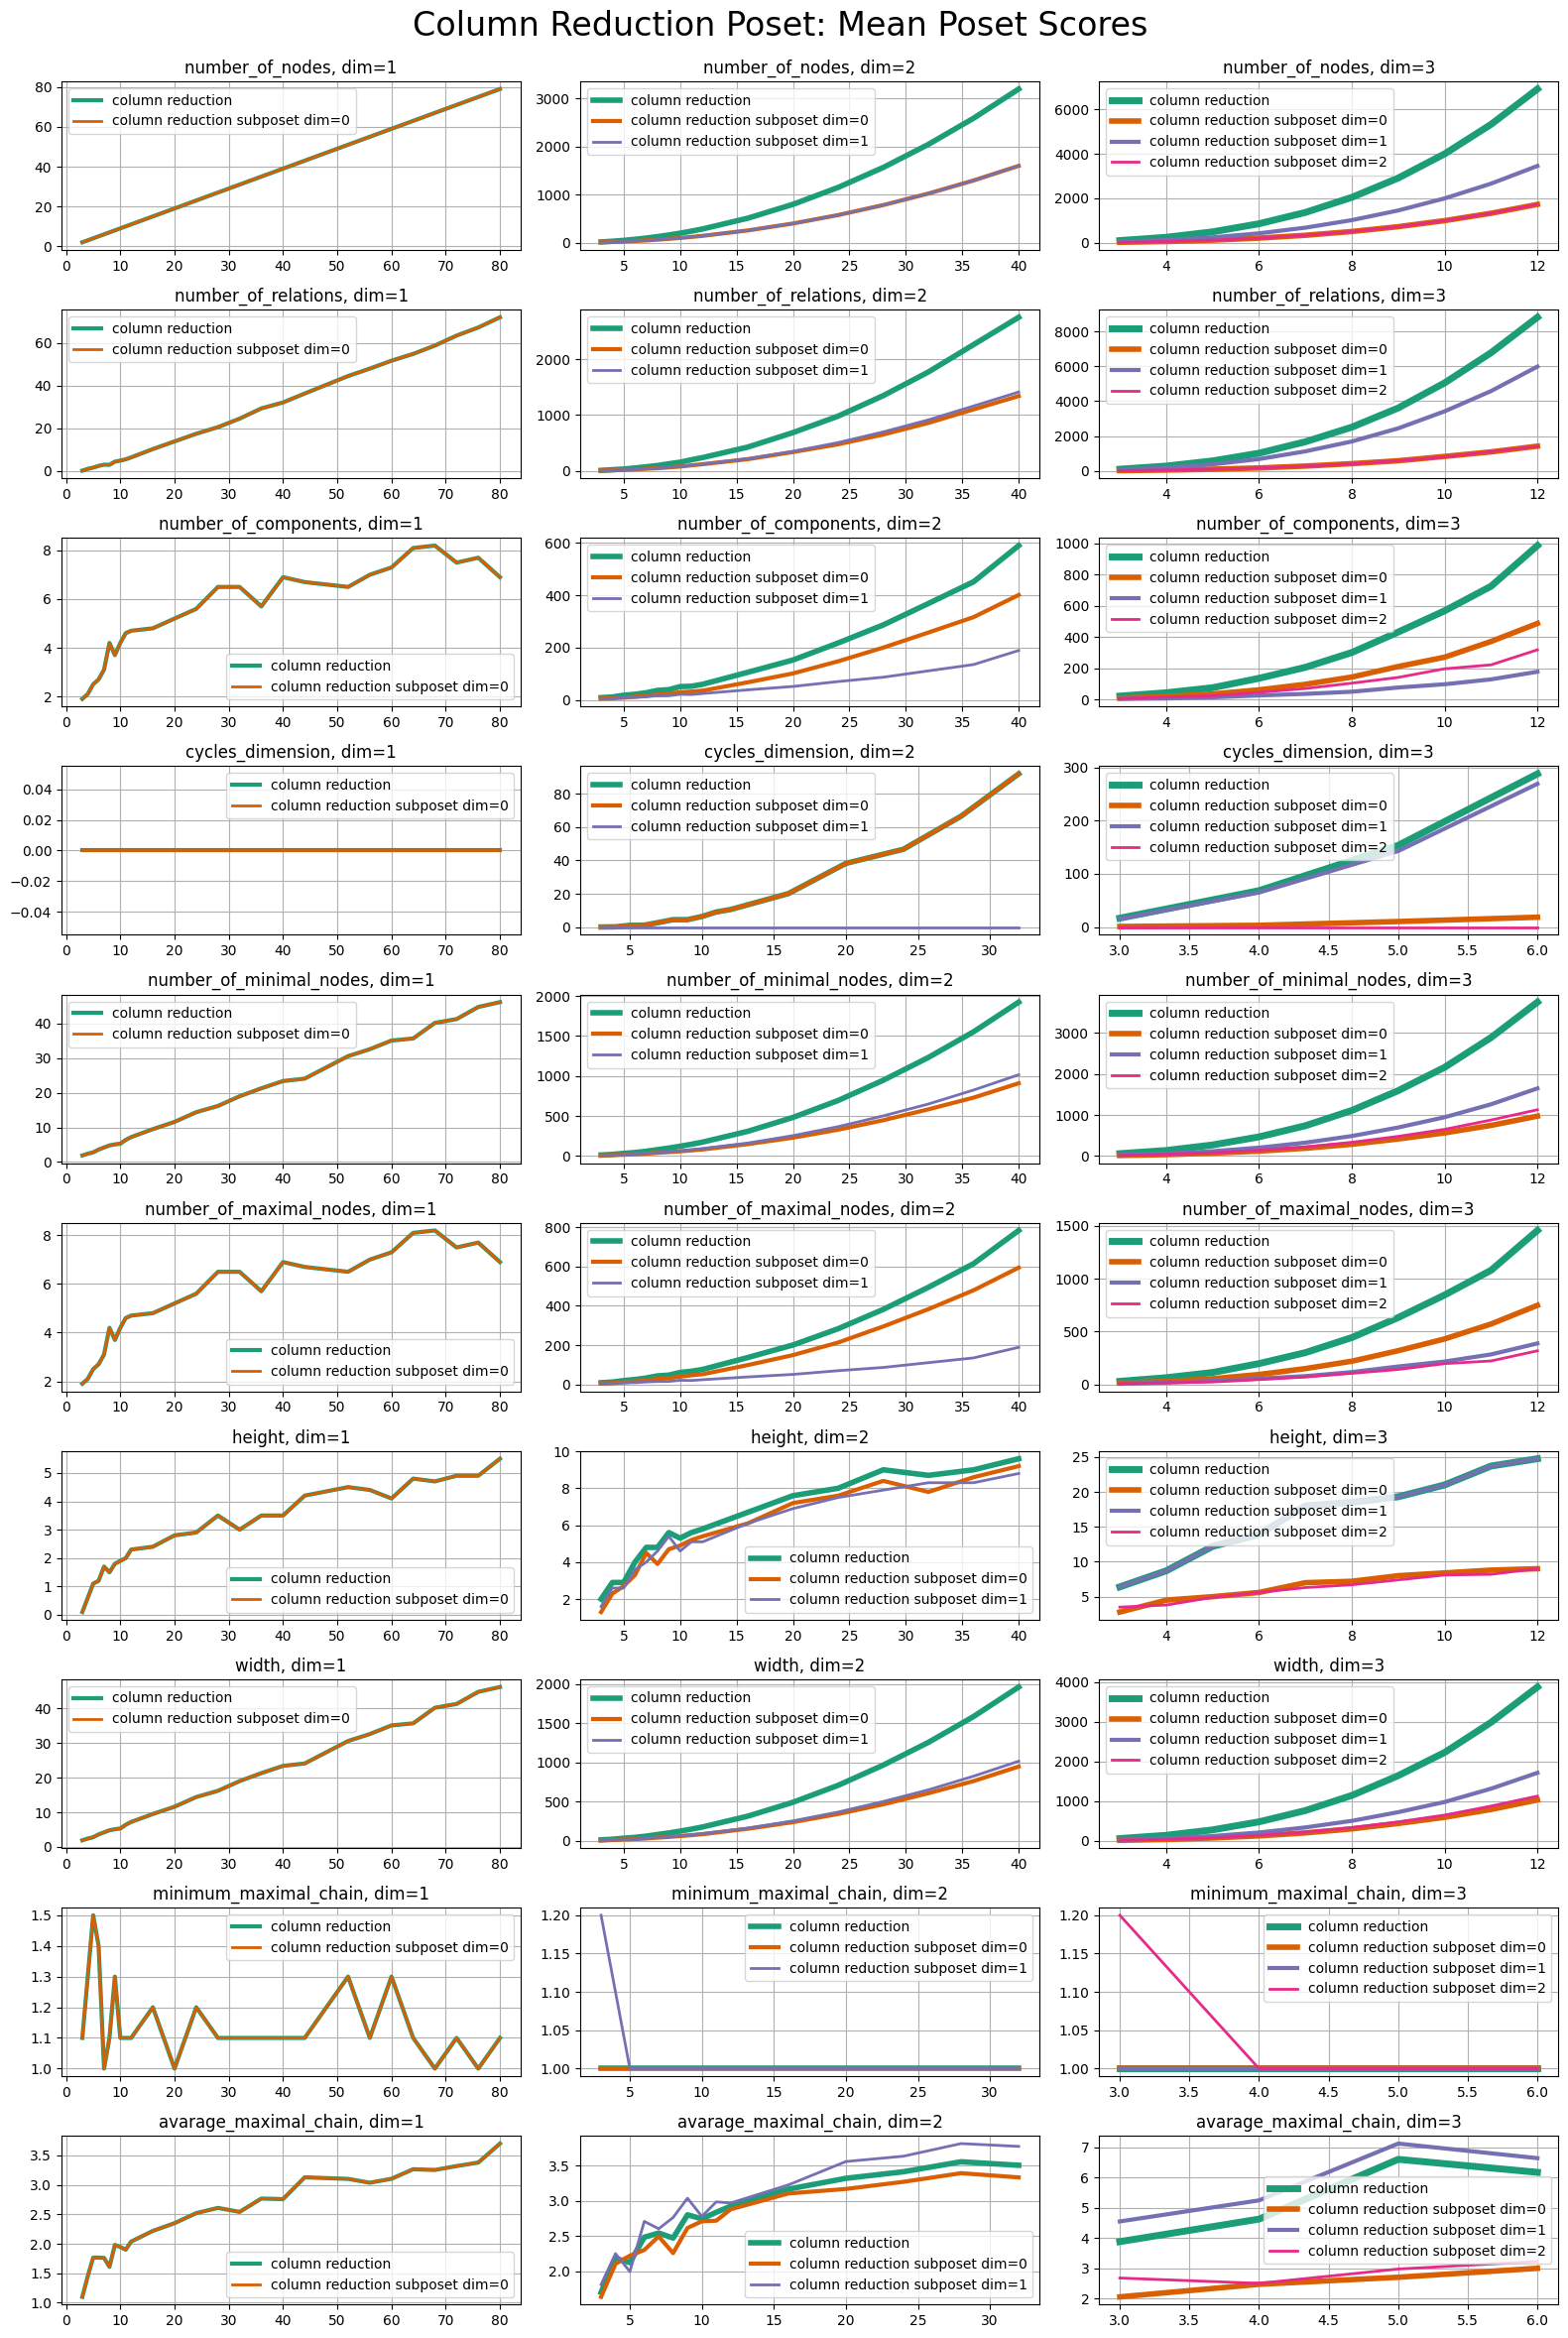

In [19]:
score_cols = interesting_poset_scores_names
max_dim = df_poset_scores['dim'].max()

fig, axs = plt.subplots(len(score_cols), max_dim)

# define the dataframe with interesting objects
objects = ['column reduction'] + [f'column reduction subposet dim={dim}' for dim in range(max_dim + 1)]
df_objects = df_poset_scores[df_poset_scores['object'].isin(objects)]

fig.suptitle('Column Reduction Poset: Mean Poset Scores', fontsize=24)
fig.set_figwidth(16)
fig.set_figheight(24)

for iscore, score in enumerate(score_cols):
    for dim in range(1, max_dim + 1):
        title = f'{score}, dim={dim}'
        axs[iscore, dim - 1].set_title(title)
        #df_use = df_poset_scores[df_poset_scores['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean().reset_index().pivot(columns='object', index='n', values=score)
        df_use = df_objects[df_objects['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean().reset_index().pivot(columns='object', index='n', values=score)
        for icol, col in enumerate(df_use.columns):
            axs[iscore, dim - 1].plot(df_use.index, df_use[col], label=col, linewidth=(len(df_use.columns) + 1 - icol), color=cmap(icol))
        axs[iscore, dim - 1].legend()
        axs[iscore, dim - 1].grid(True)
        
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.savefig('raports/pics/torus scores/mean poset scores - column reduction.png')

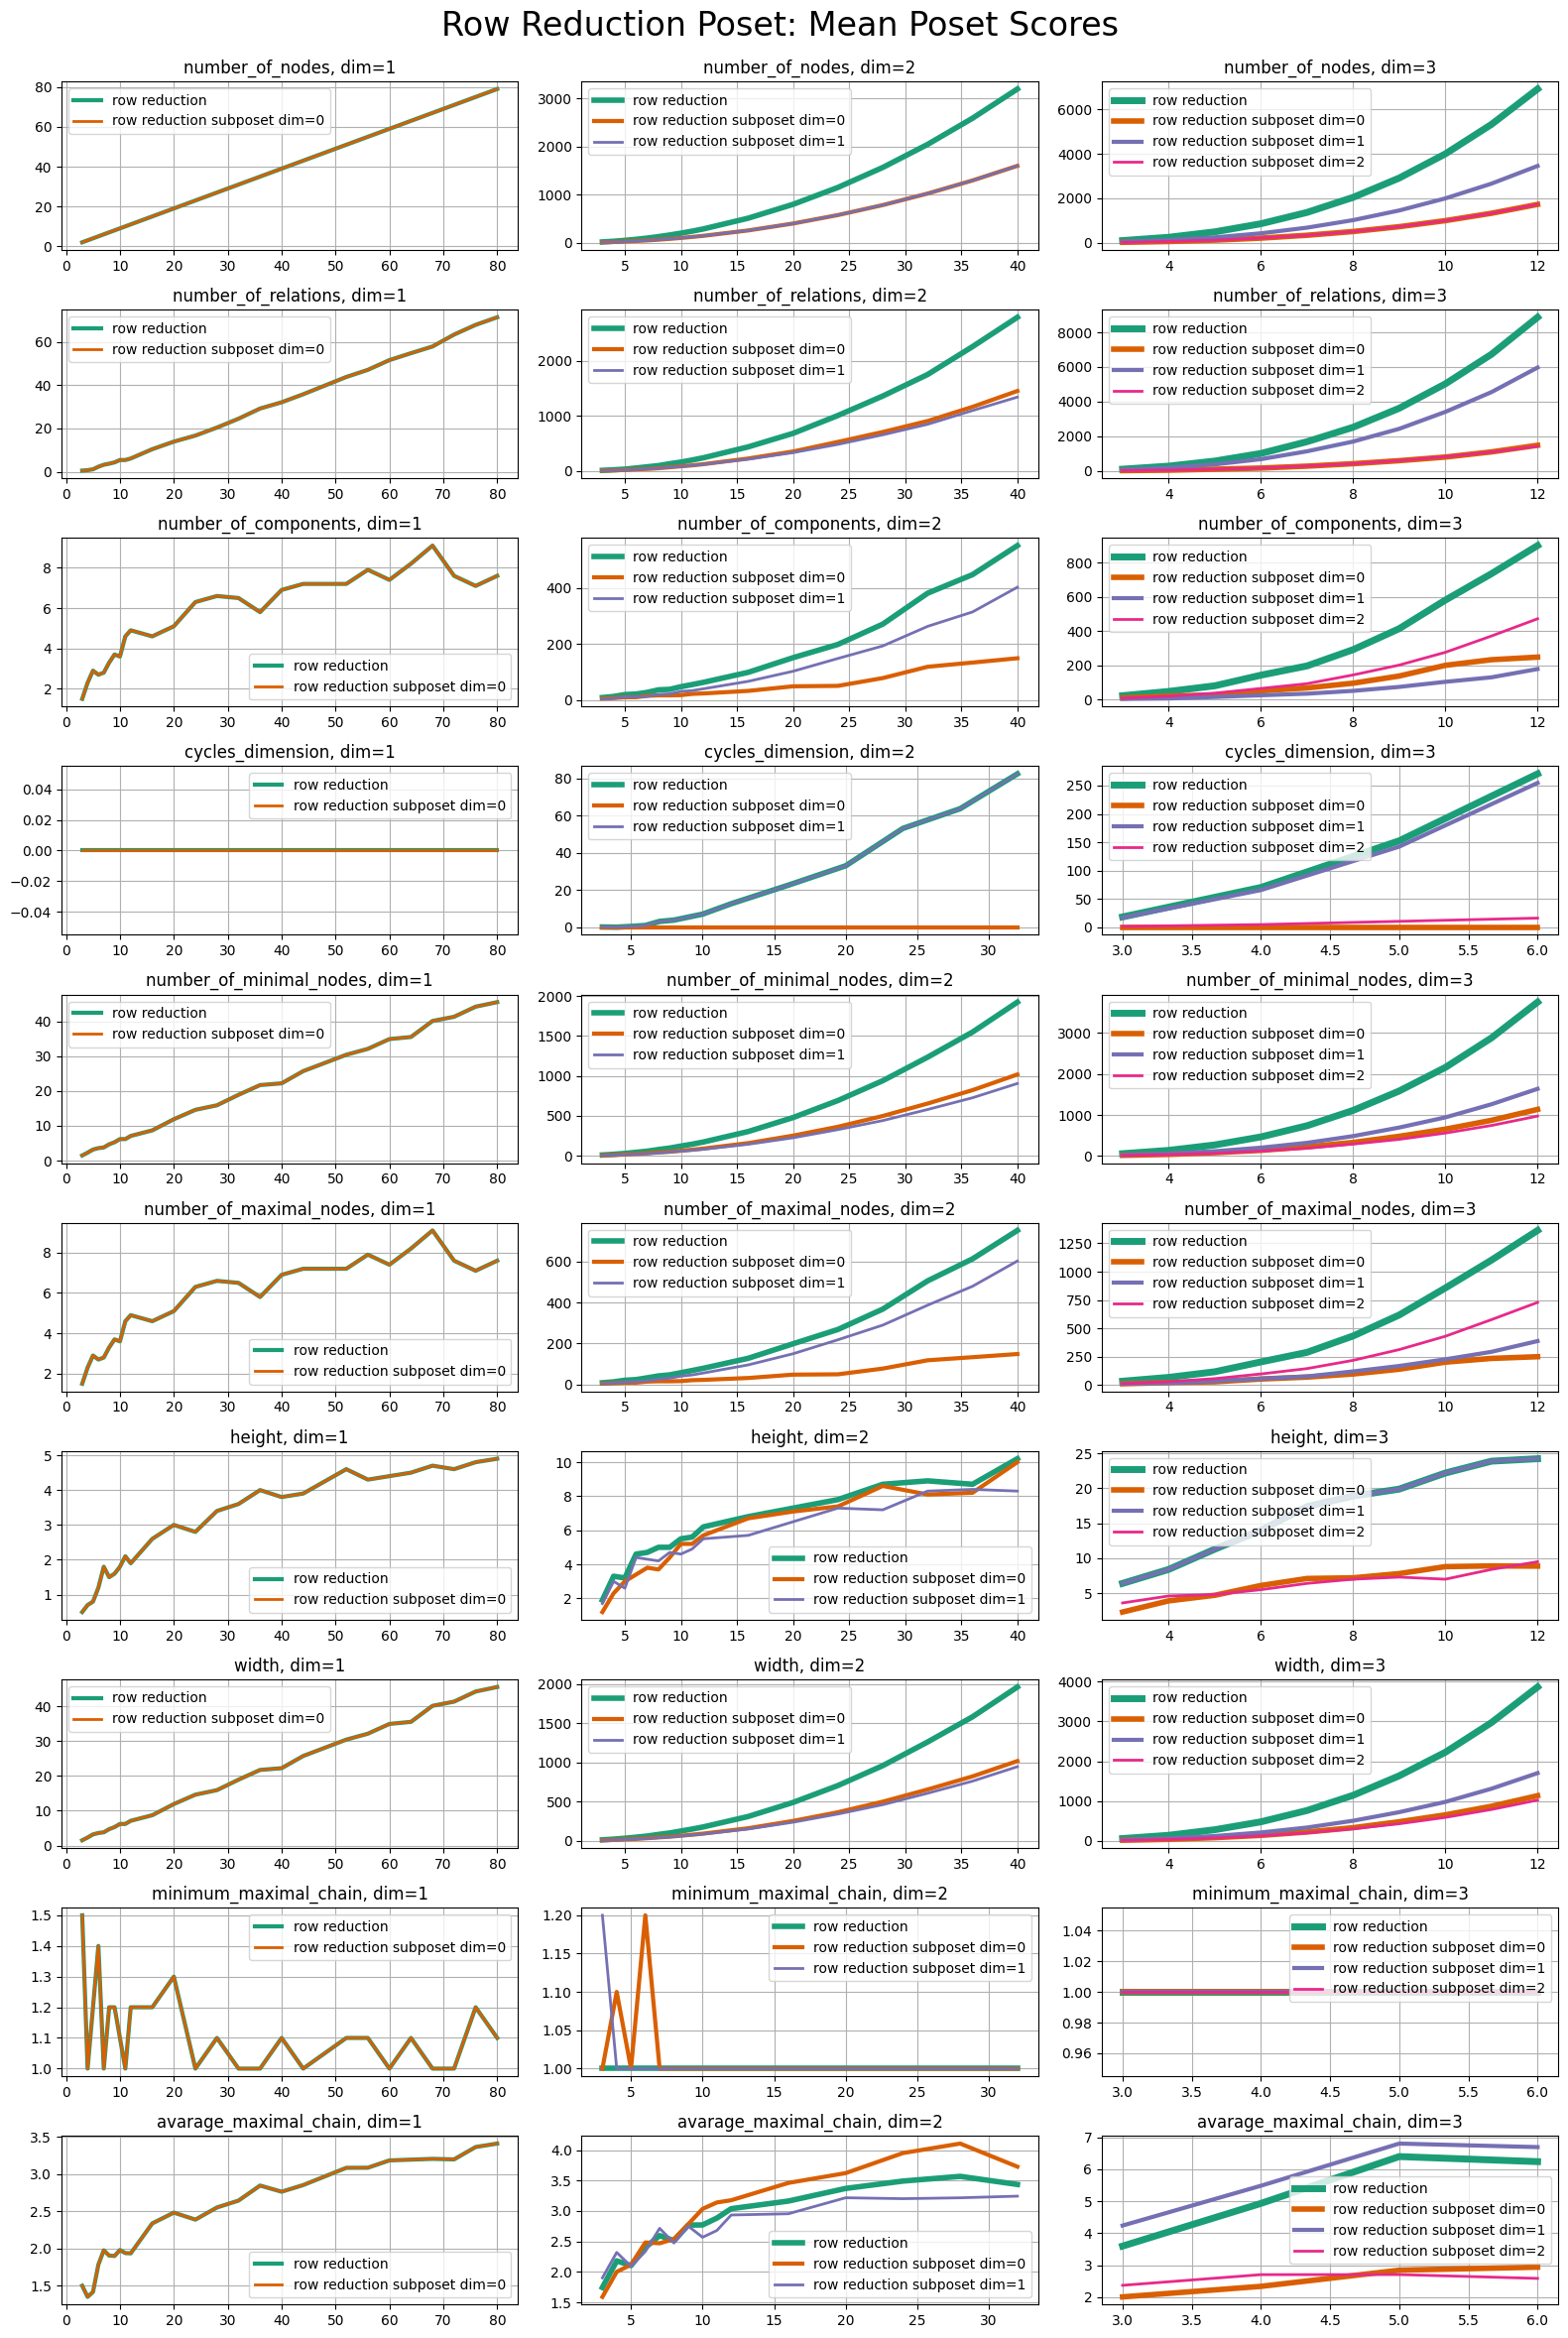

In [20]:
score_cols = interesting_poset_scores_names
max_dim = df_poset_scores['dim'].max()

fig, axs = plt.subplots(len(score_cols), max_dim)

# define the dataframe with interesting objects
objects = ['row reduction'] + [f'row reduction subposet dim={dim}' for dim in range(max_dim + 1)]
df_objects = df_poset_scores[df_poset_scores['object'].isin(objects)]

fig.suptitle('Row Reduction Poset: Mean Poset Scores', fontsize=24)
fig.set_figwidth(16)
fig.set_figheight(24)

for iscore, score in enumerate(score_cols):
    for dim in range(1, max_dim + 1):
        title = f'{score}, dim={dim}'
        axs[iscore, dim - 1].set_title(title)
        #df_use = df_poset_scores[df_poset_scores['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean().reset_index().pivot(columns='object', index='n', values=score)
        df_use = df_objects[df_objects['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean().reset_index().pivot(columns='object', index='n', values=score)
        for icol, col in enumerate(df_use.columns):
            axs[iscore, dim - 1].plot(df_use.index, df_use[col], label=col, linewidth=(len(df_use.columns) + 1 - icol), color=cmap(icol))
        axs[iscore, dim - 1].legend()
        axs[iscore, dim - 1].grid(True)
        
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.savefig('raports/pics/torus scores/mean poset scores - row reduction.png')

# Plot Node Scores

In [21]:
restore_node_scores = False

In [22]:
from src import node_scores

In [23]:
df_node_scores = [pd.DataFrame(i['node scores']) for i in ls]
for i in range(len(df_node_scores)):
    df_node_scores[i].insert(0, 'index', value=i)
df_node_scores = pd.concat(df_node_scores)


df_node_scores = df_cases[['index', 'n', 'dim']].join(df_node_scores.set_index('index'), on='index').reset_index(drop=True)

print(f'df_node_scores.shape = {df_node_scores.shape}')
df_node_scores.head()

df_node_scores.shape = (44928, 14)


index  n  dim                           object              node  \
0      0  4    1                             full  (0,),((0,),(1,))   
1      0  4    1                   subposet dim=0  (0,),((0,),(1,))   
2      0  4    1                 column reduction  (0,),((0,),(1,))   
3      0  4    1  column reduction subposet dim=0  (0,),((0,),(1,))   
4      0  4    1                    row reduction  (0,),((0,),(1,))   

   ancestors_cycles_dimension  ancestors_height  ancestors_number  \
0                         0.0               0.0               0.0   
1                         0.0               0.0               0.0   
2                         0.0               0.0               0.0   
3                         0.0               0.0               0.0   
4                         0.0               0.0               0.0   

   ancestors_width  incomparable_number  successors_cycles_dimension  \
0              0.0                  2.0                          0.0   
1              0.0                  2.0                          0.0   
2              0.0                  2.0                          0.0   
3              0.0                  2.0                          0.0   
4              0.0                  2.0                          0.0   

   successors_height  successors_number  successors_width  
0                0.0                0.0               0.0  
1                0.0                0.0               0.0  
2                0.0                0.0               0.0  
3                0.0                0.0               0.0  
4                0.0                0.0               0.0

In [24]:
interesting_node_scores = [node_scores.ancestors_number,
                           node_scores.ancestors_height, 
                           node_scores.ancestors_width, 
                           node_scores.ancestors_cycles_dimension, 
                           node_scores.successors_number,
                           node_scores.successors_height,
                           node_scores.successors_width, 
                           node_scores.successors_cycles_dimension, 
                           ]
interesting_node_scores_names = [score.__name__ for score in interesting_node_scores]

for score in interesting_node_scores:
    if not (score.__name__ in df_node_scores.columns):
        df_node_scores[score.__name__] = np.nan

if restore_node_scores:
    missed_values = df_node_scores[[score.__name__ for score in interesting_node_scores]].isna().sum().sum()
    print(f'There are {missed_values} values missed and should be restored.')
    
    with tqdm(total=missed_values) as pbar:
        for i in df_node_scores[df_node_scores[interesting_node_scores_names].isna().any(axis=1)].index:
            if df_node_scores.loc[i, interesting_node_scores_names].isna().any():
                dp = df_cases.loc[df_cases['index'] == df_node_scores.loc[i, 'index'], 'depth poset'].values[0]
                node = df_node_scores.loc[i, 'node']
                if df_node_scores.loc[i, 'object'] != 'full':
                    dp_dim = int(df_node_scores.loc[i, 'object'].replace('subposet dim=', ''))
                    dp = dp.subposet_dim(dp_dim)
                for score in interesting_node_scores:
                    if pd.isna(df_node_scores.loc[i, score.__name__]):
                        df_node_scores.loc[i, score.__name__] = score(dp, node)
                        pbar.update()
        
print(f'df_node_scores.shape = {df_node_scores.shape}')
df_node_scores.head()

df_node_scores.shape = (44928, 14)


index  n  dim                           object              node  \
0      0  4    1                             full  (0,),((0,),(1,))   
1      0  4    1                   subposet dim=0  (0,),((0,),(1,))   
2      0  4    1                 column reduction  (0,),((0,),(1,))   
3      0  4    1  column reduction subposet dim=0  (0,),((0,),(1,))   
4      0  4    1                    row reduction  (0,),((0,),(1,))   

   ancestors_cycles_dimension  ancestors_height  ancestors_number  \
0                         0.0               0.0               0.0   
1                         0.0               0.0               0.0   
2                         0.0               0.0               0.0   
3                         0.0               0.0               0.0   
4                         0.0               0.0               0.0   

   ancestors_width  incomparable_number  successors_cycles_dimension  \
0              0.0                  2.0                          0.0   
1              0.0                  2.0                          0.0   
2              0.0                  2.0                          0.0   
3              0.0                  2.0                          0.0   
4              0.0                  2.0                          0.0   

   successors_height  successors_number  successors_width  
0                0.0                0.0               0.0  
1                0.0                0.0               0.0  
2                0.0                0.0               0.0  
3                0.0                0.0               0.0  
4                0.0                0.0               0.0

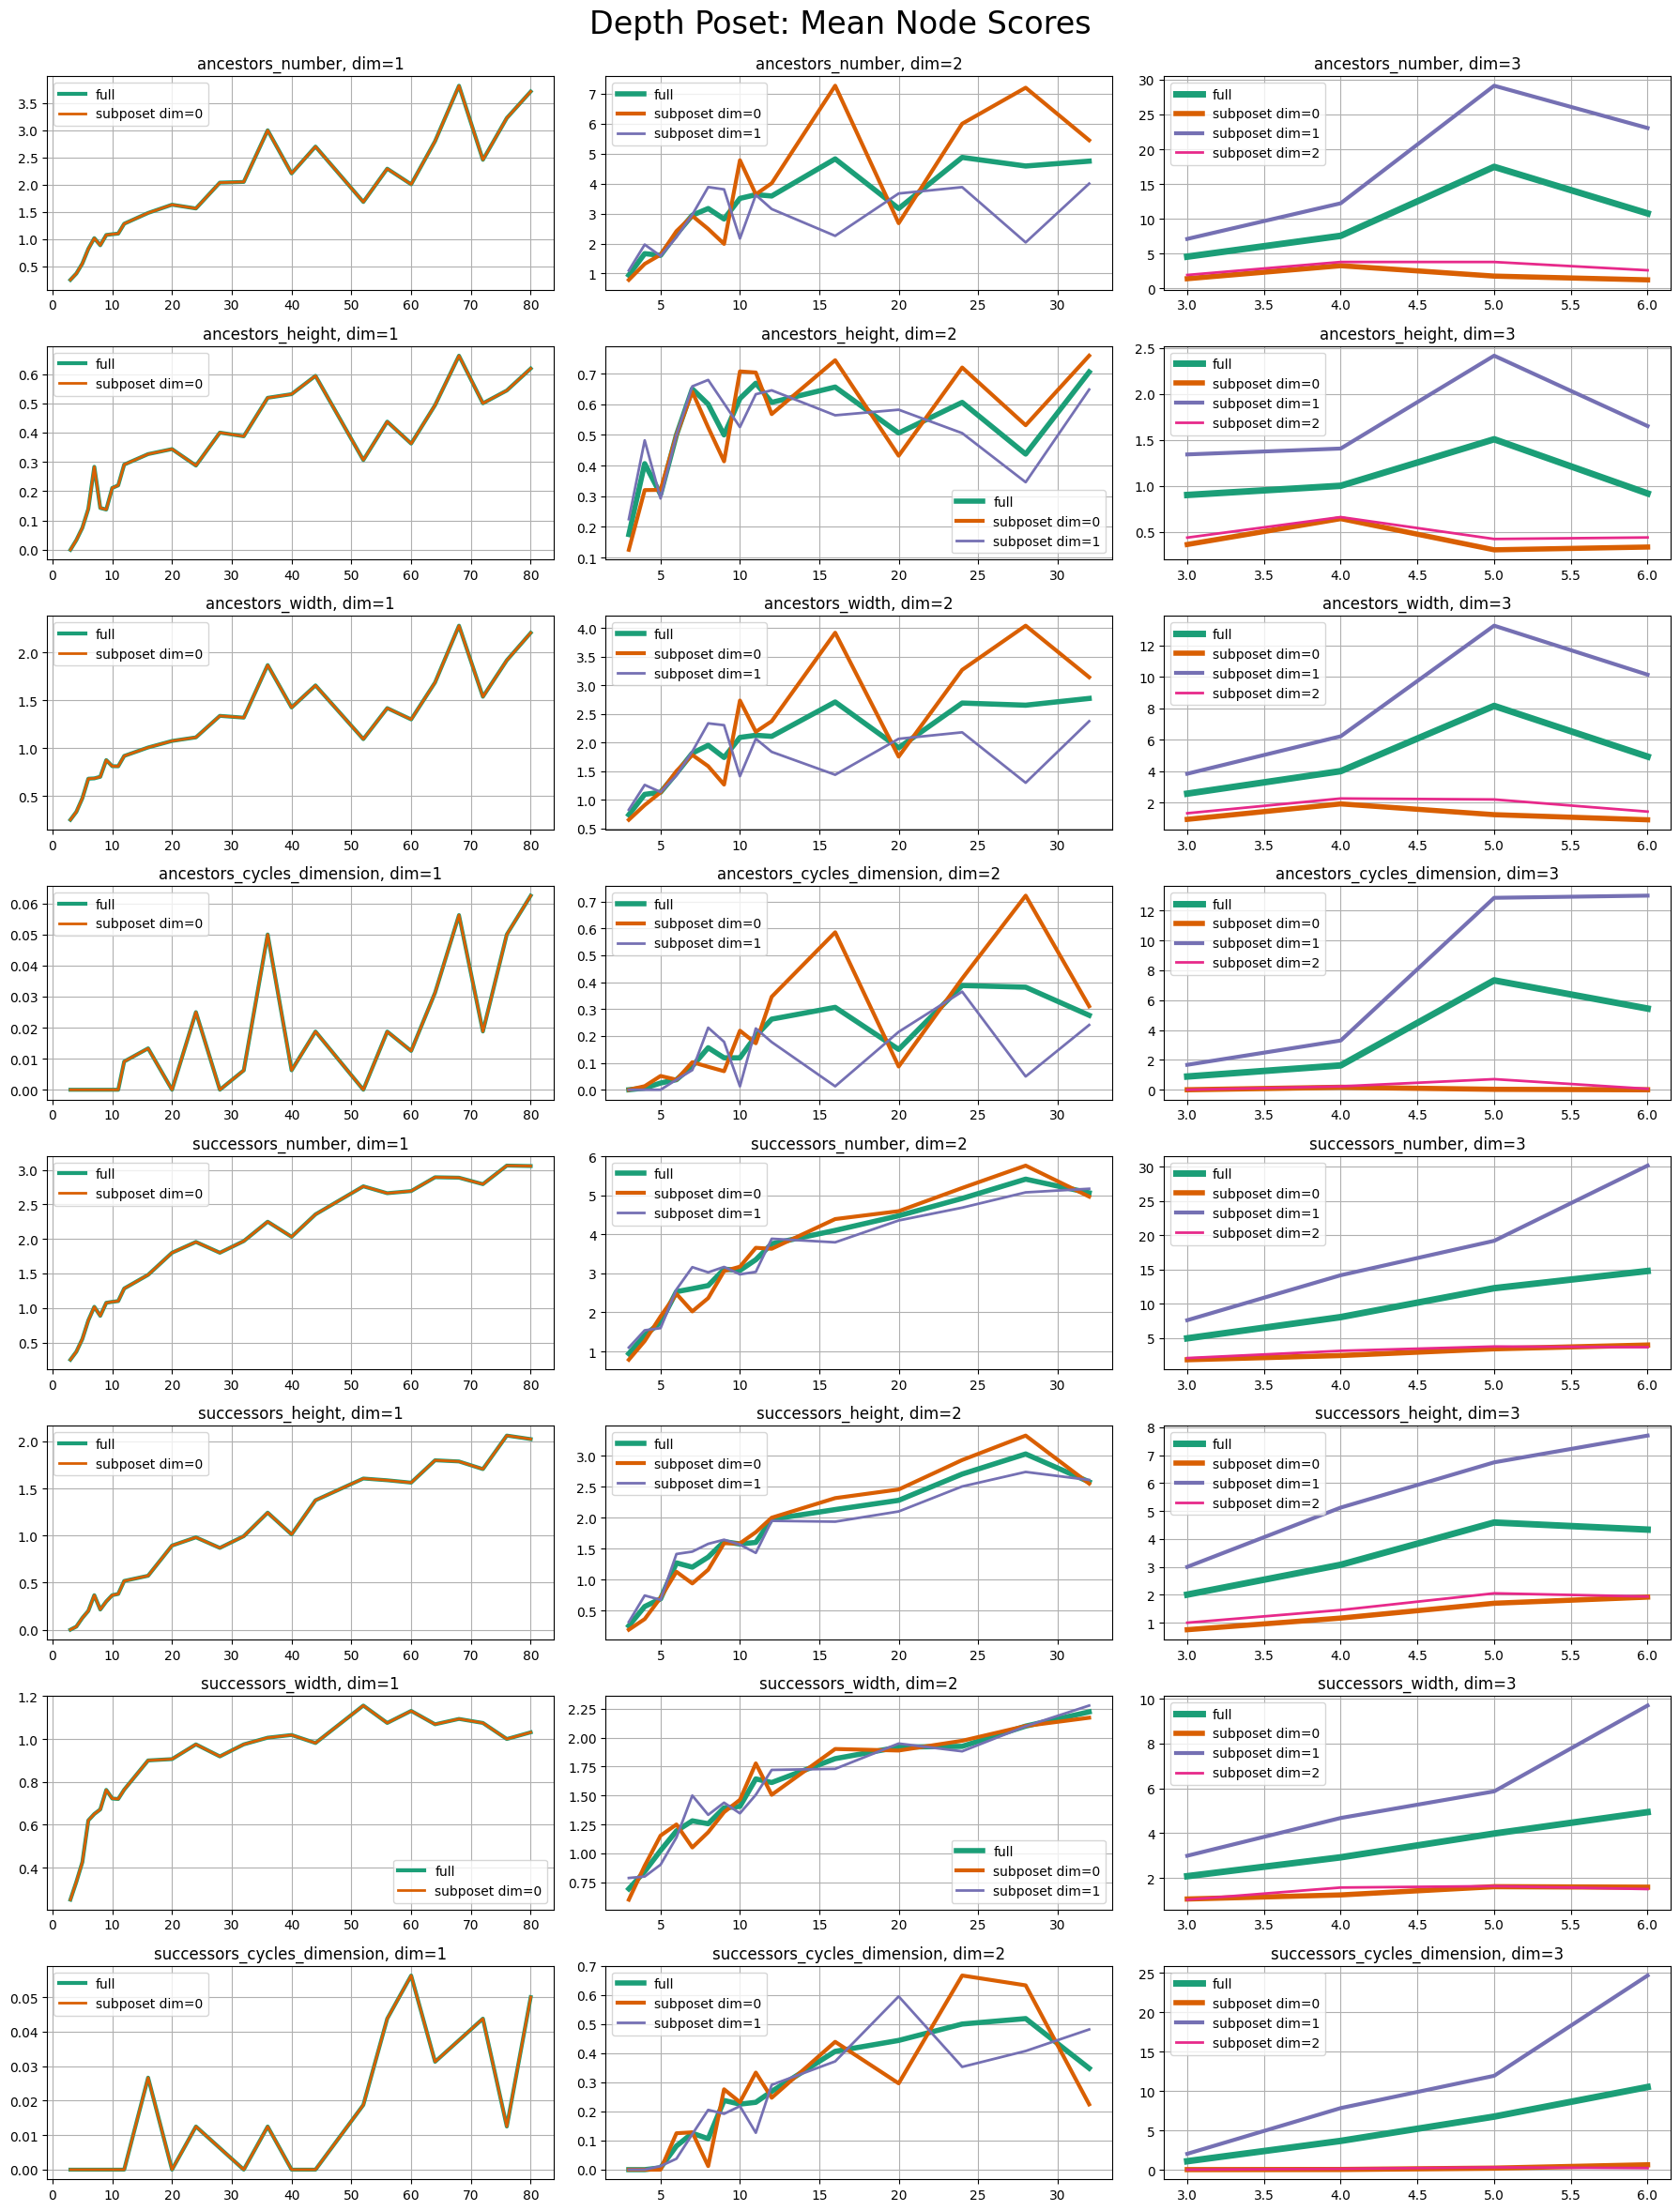

In [25]:
score_cols = interesting_node_scores_names

max_dim = df_node_scores['dim'].max()

# define the dataframe with interesting objects
objects = ['full'] + [f'subposet dim={dim}' for dim in range(max_dim + 1)]
df_objects = df_node_scores[df_node_scores['object'].isin(objects)]

try:
    fig, axs = plt.subplots(len(score_cols), max_dim)
    
    fig.suptitle('Depth Poset: Mean Node Scores', fontsize=24)
    fig.set_figwidth(18)
    fig.set_figheight(24)
    
    for iscore, score in enumerate(score_cols):
        for dim in range(1, max_dim + 1):
            title = f'{score}, dim={dim}'
            axs[iscore, dim - 1].set_title(title)
            df_use = df_objects[df_objects['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean('score').reset_index().pivot(columns='object', index='n', values=score)
            for icol, col in enumerate(df_use.columns):
                axs[iscore, dim - 1].plot(df_use.index, df_use[col], label=col, linewidth=(len(df_use.columns) + 1 - icol), color=cmap(icol))
            axs[iscore, dim - 1].legend()
            axs[iscore, dim - 1].grid(True)
            
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
except ValueError:
    fig, ax = plt.subplots()
    fig.set_figwidth(18)
    fig.set_figheight(24)
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('raports/pics/torus scores/mean node scores.png')

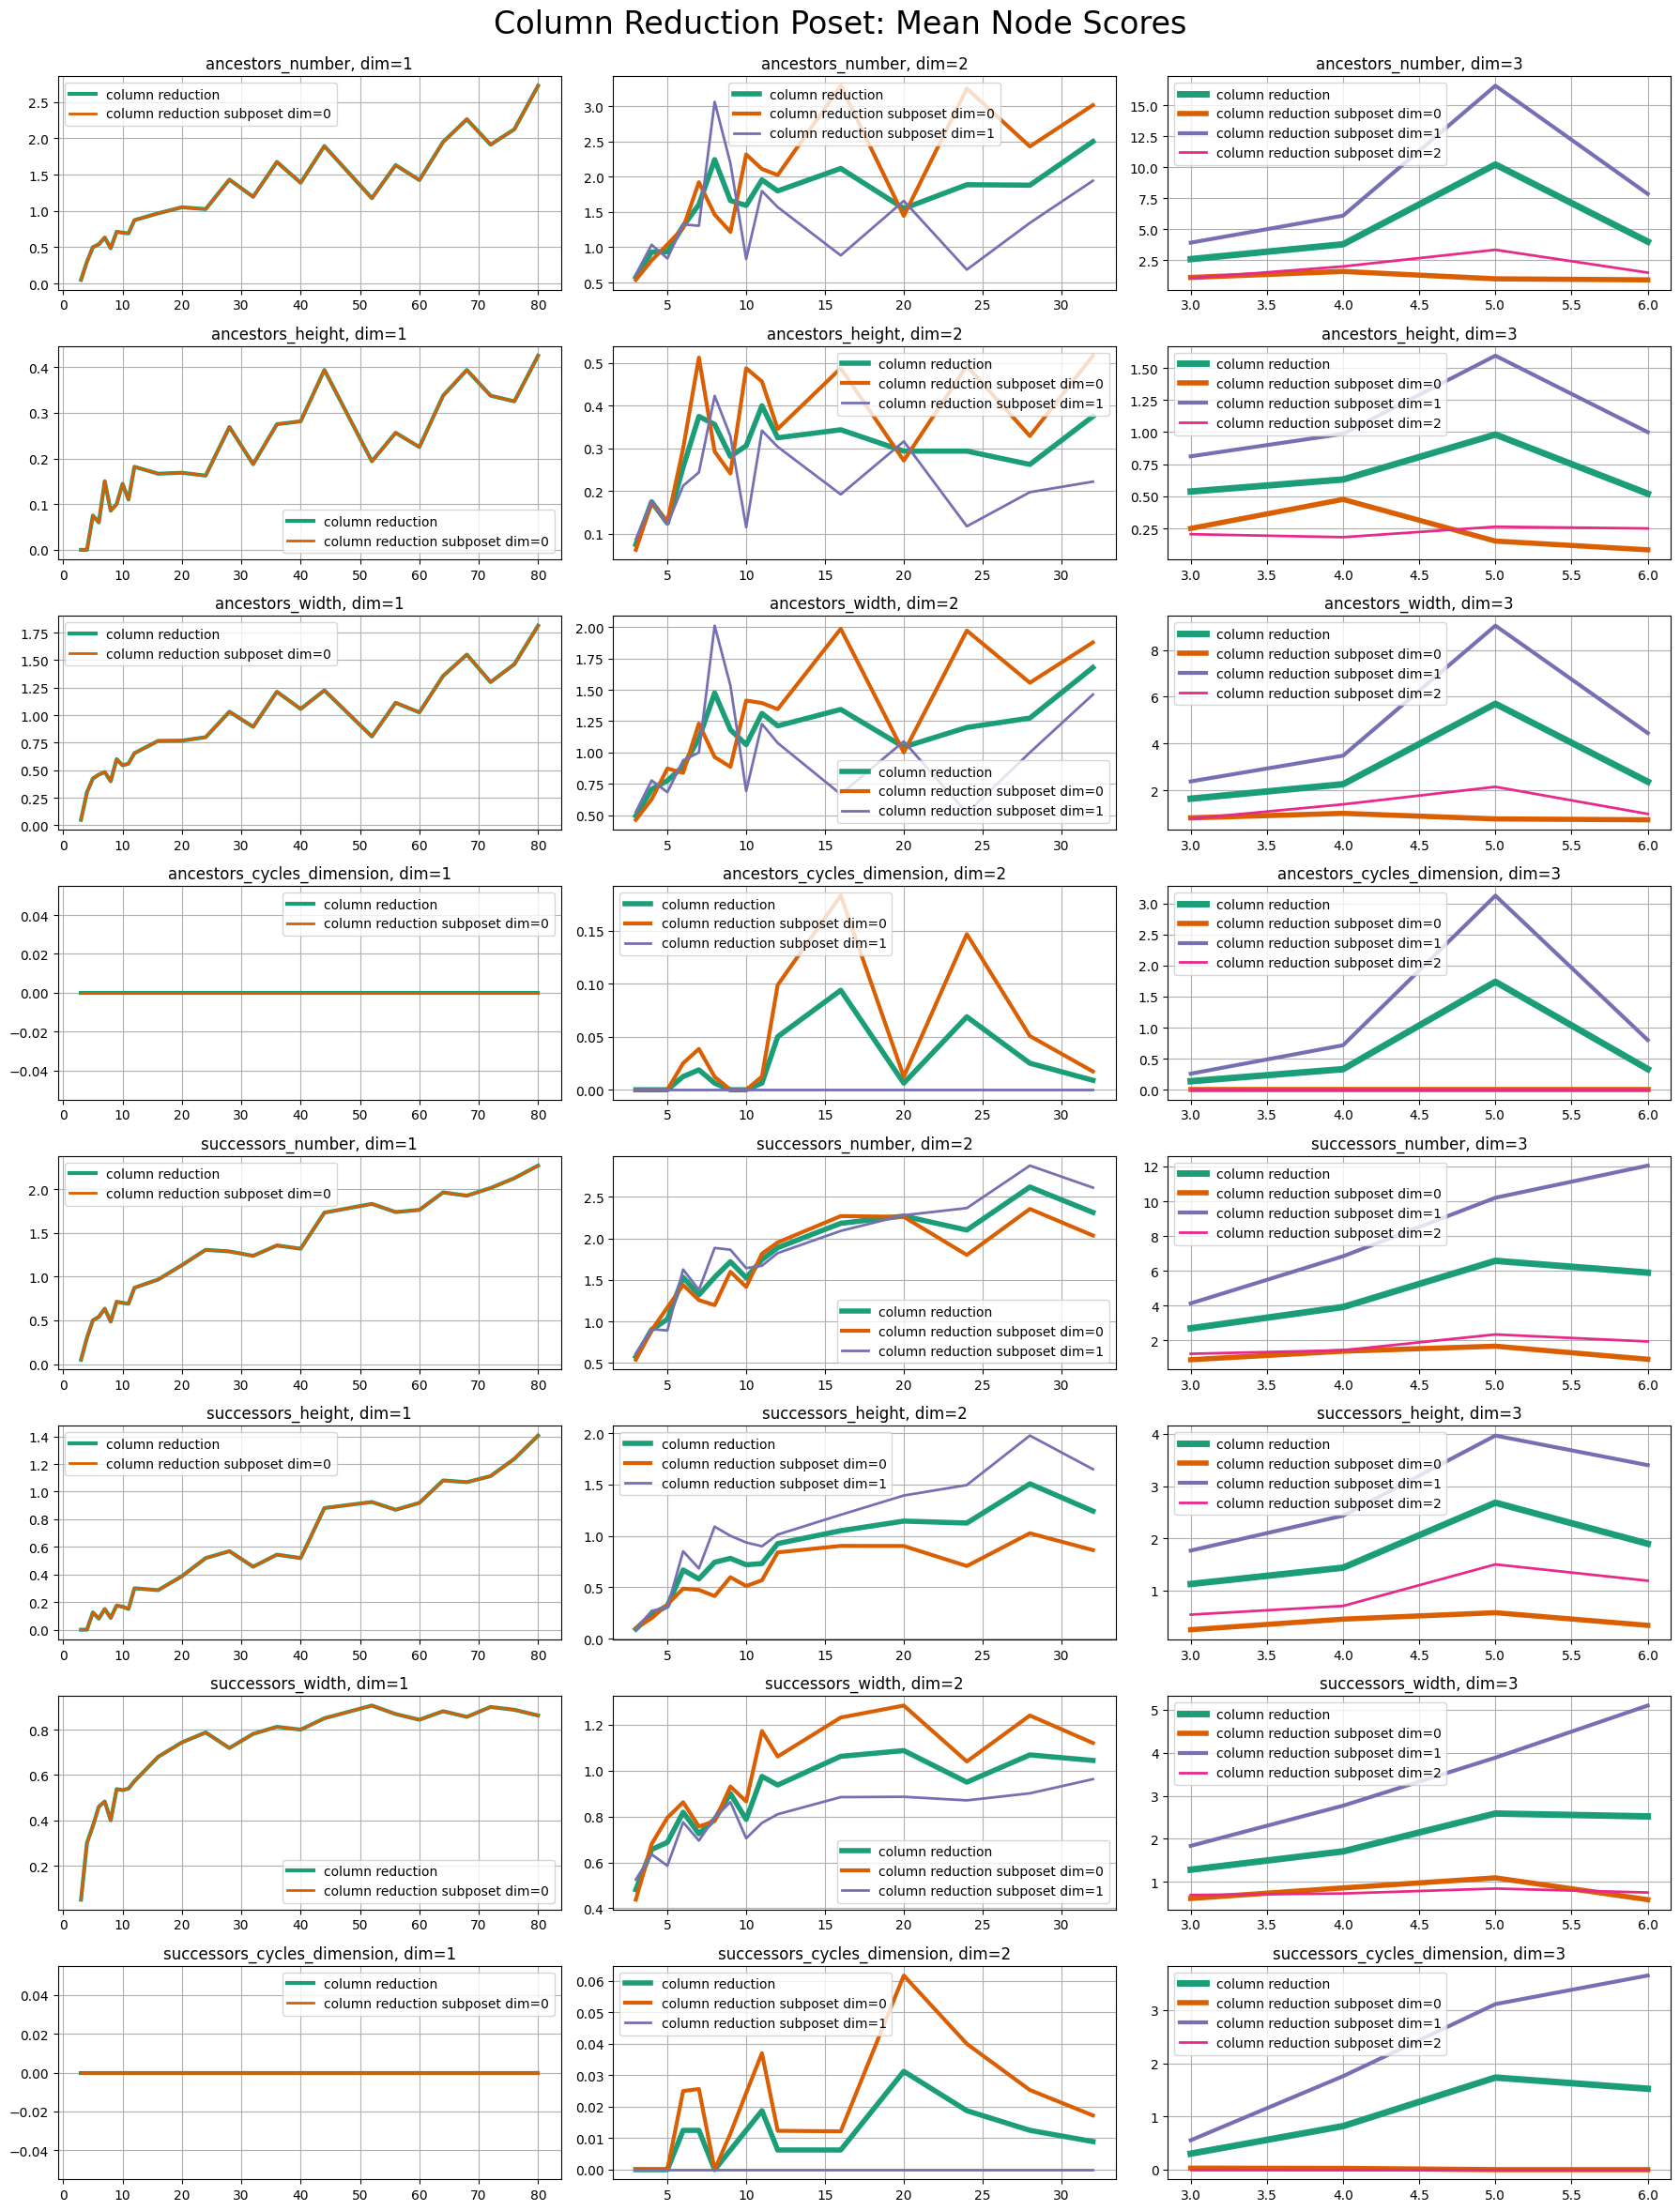

In [26]:
score_cols = interesting_node_scores_names

max_dim = df_node_scores['dim'].max()

# define the dataframe with interesting objects
objects = ['column reduction'] + [f'column reduction subposet dim={dim}' for dim in range(max_dim + 1)]
df_objects = df_node_scores[df_node_scores['object'].isin(objects)]

try:
    fig, axs = plt.subplots(len(score_cols), max_dim)
    
    fig.suptitle('Column Reduction Poset: Mean Node Scores', fontsize=24)
    fig.set_figwidth(18)
    fig.set_figheight(24)
    
    for iscore, score in enumerate(score_cols):
        for dim in range(1, max_dim + 1):
            title = f'{score}, dim={dim}'
            axs[iscore, dim - 1].set_title(title)
            df_use = df_objects[df_objects['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean('score').reset_index().pivot(columns='object', index='n', values=score)
            for icol, col in enumerate(df_use.columns):
                axs[iscore, dim - 1].plot(df_use.index, df_use[col], label=col, linewidth=(len(df_use.columns) + 1 - icol), color=cmap(icol))
            axs[iscore, dim - 1].legend()
            axs[iscore, dim - 1].grid(True)
            
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
except ValueError:
    fig, ax = plt.subplots()
    fig.set_figwidth(18)
    fig.set_figheight(24)
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('raports/pics/torus scores/mean node scores - column reduction.png')

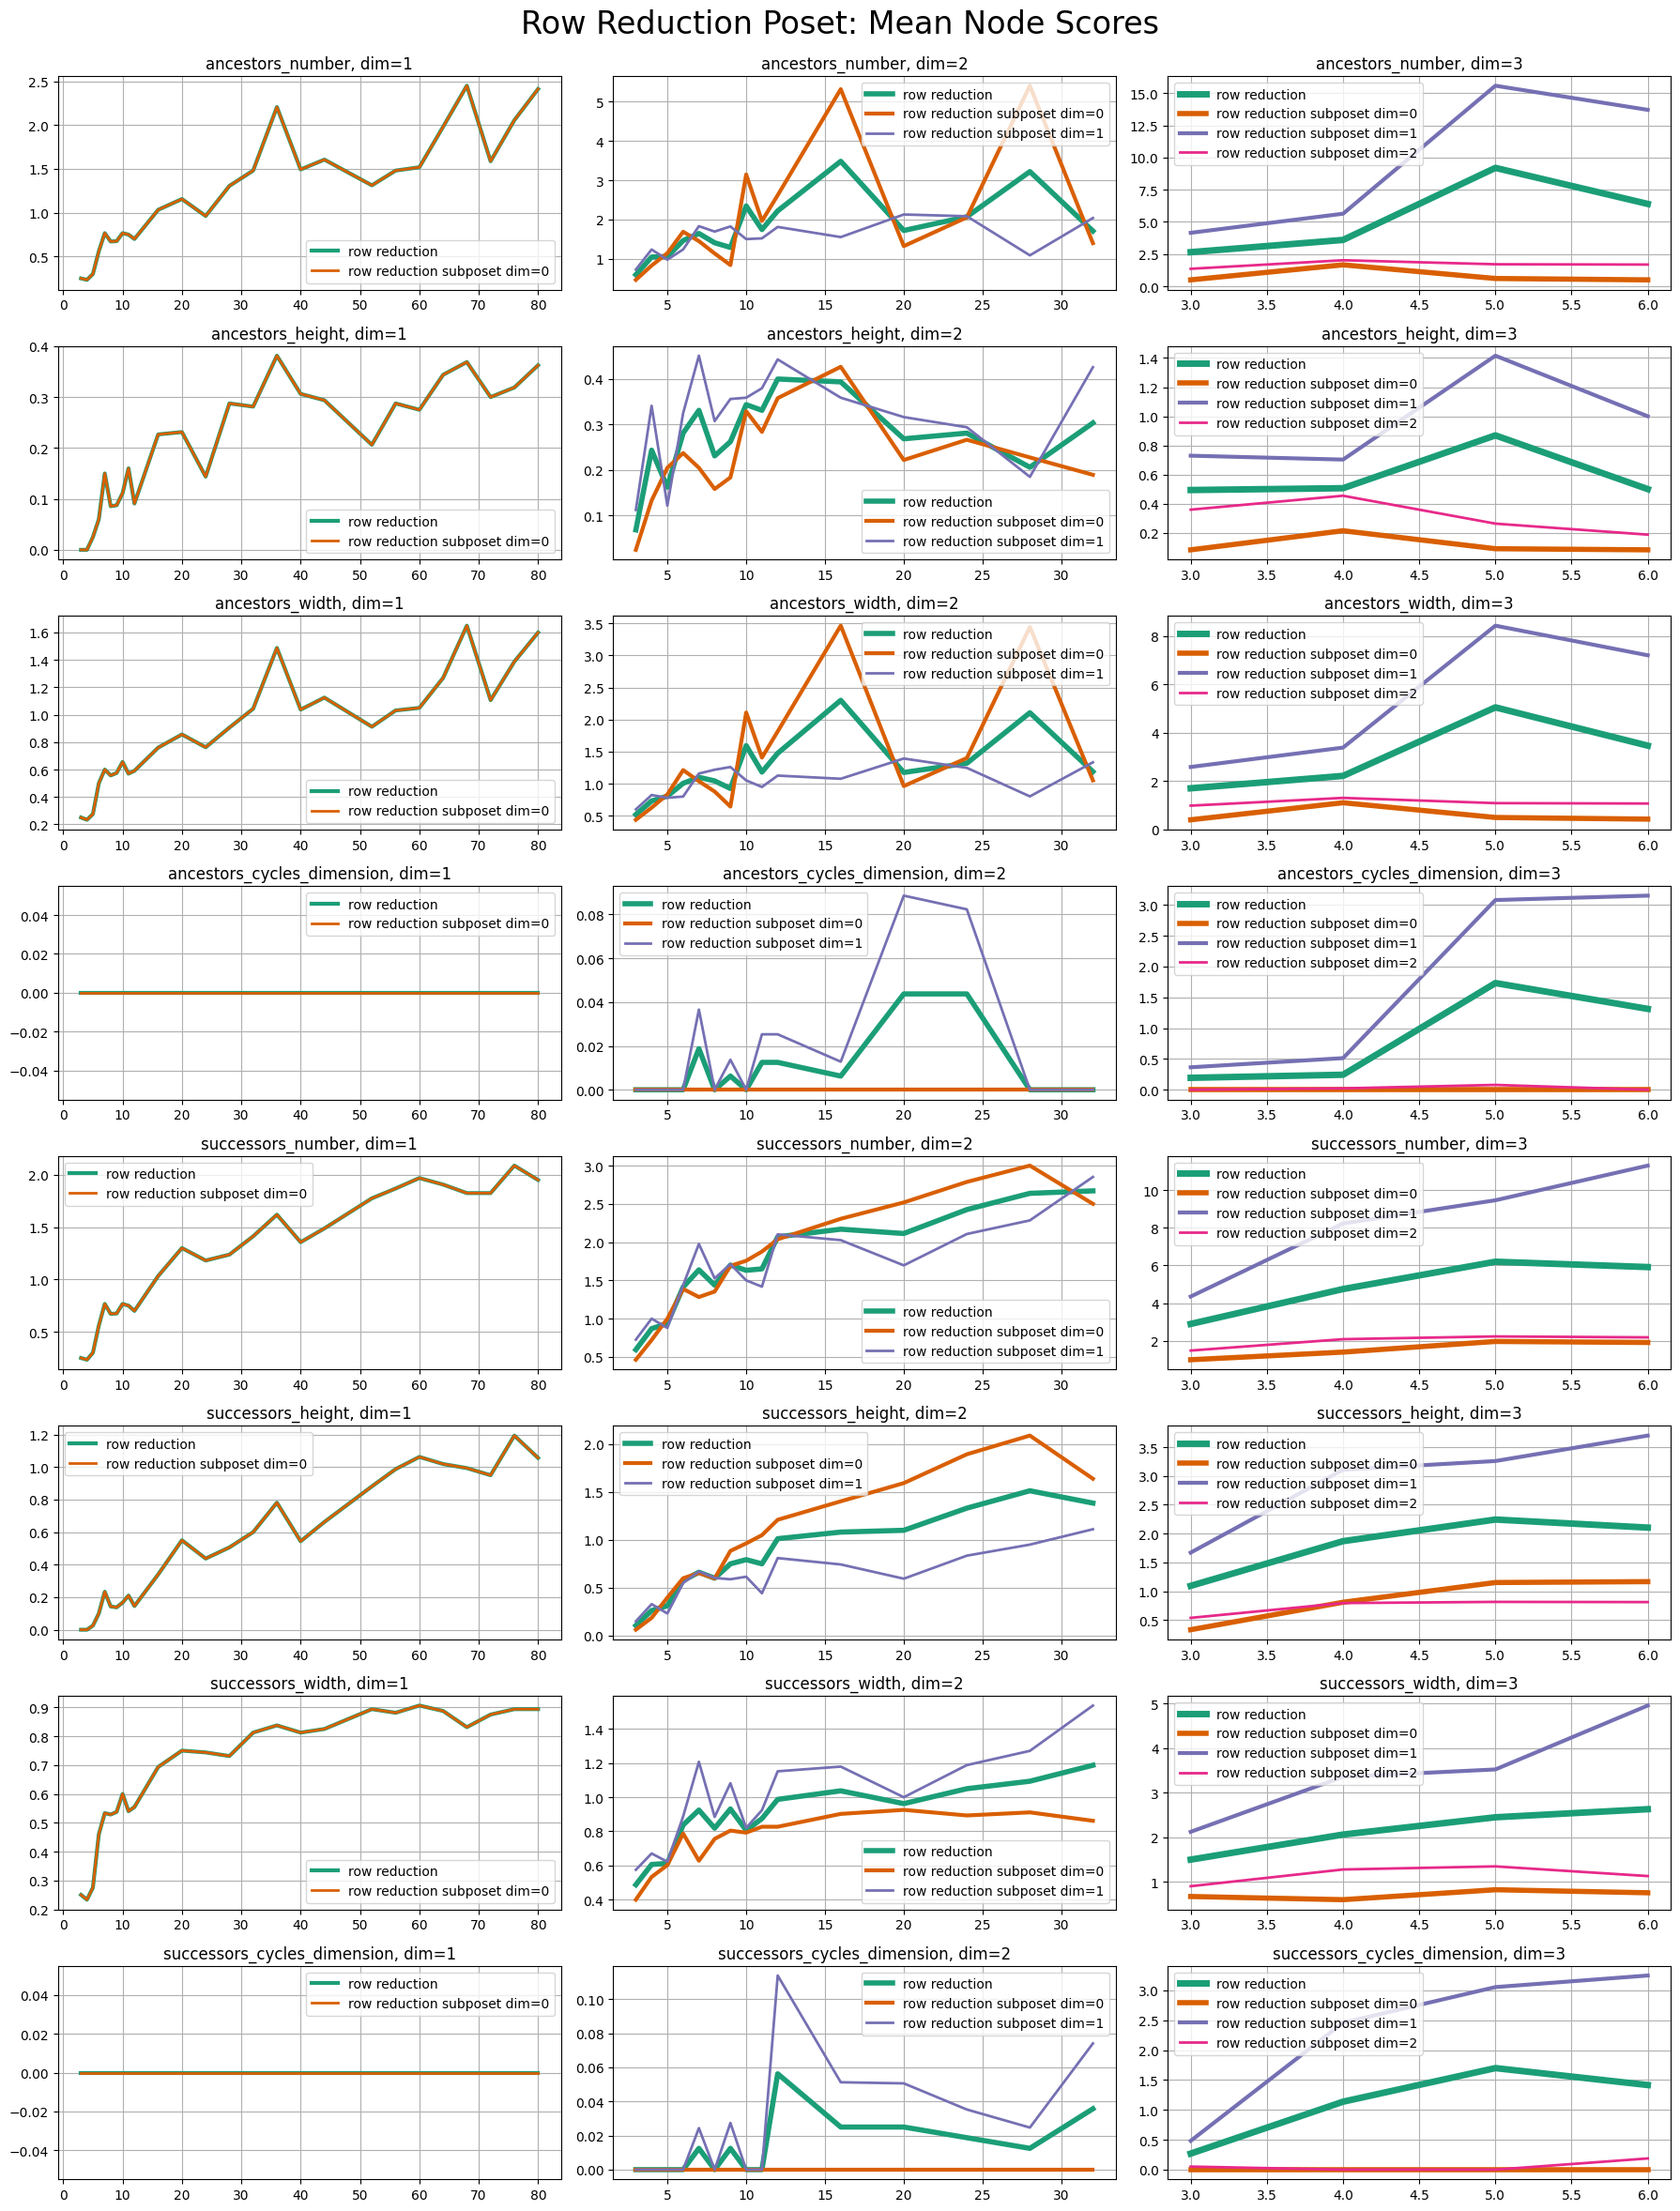

In [27]:
score_cols = interesting_node_scores_names

max_dim = df_node_scores['dim'].max()

# define the dataframe with interesting objects
objects = ['row reduction'] + [f'row reduction subposet dim={dim}' for dim in range(max_dim + 1)]
df_objects = df_node_scores[df_node_scores['object'].isin(objects)]

try:
    fig, axs = plt.subplots(len(score_cols), max_dim)
    
    fig.suptitle('Row Reduction Poset: Mean Node Scores', fontsize=24)
    fig.set_figwidth(18)
    fig.set_figheight(24)
    
    for iscore, score in enumerate(score_cols):
        for dim in range(1, max_dim + 1):
            title = f'{score}, dim={dim}'
            axs[iscore, dim - 1].set_title(title)
            df_use = df_objects[df_objects['dim'] == dim][['n', 'object', score]].groupby(['n', 'object']).mean('score').reset_index().pivot(columns='object', index='n', values=score)
            for icol, col in enumerate(df_use.columns):
                axs[iscore, dim - 1].plot(df_use.index, df_use[col], label=col, linewidth=(len(df_use.columns) + 1 - icol), color=cmap(icol))
            axs[iscore, dim - 1].legend()
            axs[iscore, dim - 1].grid(True)
            
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
except ValueError:
    fig, ax = plt.subplots()
    fig.set_figwidth(18)
    fig.set_figheight(24)
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('raports/pics/torus scores/mean node scores - row reduction.png')

# Compile Raport Document

In [28]:
import src.poset_scores as poset_scores
import src.node_scores as node_scores
import inspect

In [29]:
def href_links(s: str, text='link') -> str:
    # replacing links in string with LaTeX format
    for w in s.split():
        if w[:6] == r'https:':
            if text is None:
                s = s.replace(w, f'\href{{{w}}}' + f'{{{w}}}'.replace('_', r'\_'))
            else:
                s = s.replace(w, f'\href{{{w}}}' + f'{{{text}}}')
    return s

In [30]:
# poset_scores description
s_poset_scores = r'\begin{itemize}' + '\n'

#for name, obj in inspect.getmembers(poset_scores, inspect.isfunction):
for obj, name in zip(interesting_poset_scores, interesting_poset_scores_names):
    if obj.__module__ == poset_scores.__name__:
        s_poset_scores += r"\item \textbf{" + name.replace('_', r'\_') + " }: " + href_links(obj.__doc__.strip()) + "\n"
s_poset_scores += r'\end{itemize}'

print(s_poset_scores)

\begin{itemize}
\item \textbf{number\_of\_nodes }: Returns the number of nodes in the poset.
\item \textbf{number\_of\_relations }: Returns the number of relations in the transitive reduction.
\item \textbf{number\_of\_components }: Returns the number of connetcted components in the poset
\item \textbf{cycles\_dimension }: Returns the dimension of space of cycles in reduction.
\item \textbf{number\_of\_minimal\_nodes }: Returns the number of minimal nodes.
\item \textbf{number\_of\_maximal\_nodes }: Returns the number of maximal nodes.
\item \textbf{height }: Returns the poset height - the length of the longest chain.
\item \textbf{width }: Returns the poset width - the length of the longest antichain (subset, s.t. all elements are pairwise incomparable).
    The algorithm is based on Dilworth's theorem and it's proof via Kőnig's theorem:
    \href{https://en.wikipedia.org/wiki/Dilworth%27s_theorem}{link}
\item \textbf{minimum\_maximal\_chain }: Returns the minimum size of maximal chai

In [31]:
# node_scores description
s_node_scores = r'\begin{itemize}' + '\n'

#for name, obj in inspect.getmembers(node_scores, inspect.isfunction):
for obj, name in zip(interesting_node_scores, interesting_node_scores_names):
    if obj.__module__ == node_scores.__name__:
        s_node_scores += r"\item \textbf{" + name.replace('_', r'\_') + "}: " + href_links(obj.__doc__.strip()) + "\n"
s_node_scores += r'\end{itemize}'

print(s_node_scores)

\begin{itemize}
\item \textbf{ancestors\_number}: Returns the number of nodes higher than given
\item \textbf{ancestors\_height}: Returns the size of maximum chain of subposet of nodes higher or equal than given
\item \textbf{ancestors\_width}: Returns the size of maximum chain of subposet of nodes higher or equal than given
\item \textbf{ancestors\_cycles\_dimension}: Returns the the dimension of space of cycles in reduction of subposet of nodes higher or equal than given
\item \textbf{successors\_number}: Returns the number of nodes higher than given
\item \textbf{successors\_height}: Returns the size of maximum chain of subposet of nodes lower or equal than given
\item \textbf{successors\_width}: Returns the size of maximum chain of subposet of nodes lower or equal than given
\item \textbf{successors\_cycles\_dimension}: Returns the the dimension of space of cycles in reduction of subposet of nodes lower or equal than given
\end{itemize}


In [32]:
# load texts, describing the process
with open('texts/barycentric-cubical-torus - model.txt', 'r') as file:
    s_model = file.read()

# load LaTeX template
with open('texts/template.tex', 'r') as file:
    s_latex = file.read()

In [33]:
# parameters to include pictures containing scores
vspace_pt = -96
resize_width = 1.38
hspace_width = round(min(0, 0.5*(1 - resize_width)), 2)


body = f"""
\\section{{Model}}
{s_model}

\\section{{Scores}}
\\subsection{{Poset Scores}}
{s_poset_scores}

\\subsection{{Node Scores}}
{s_node_scores}

\\section{{Experiments and Results}}
\\par There are {len(df_cases)} experiments done. In the Figure \\ref{{fig:cases_distribution}} we can see how cases are distributed by size and dimension.
\\begin{{figure}}[ht]
  \\centering
  \\includegraphics[width=\\textwidth]{{pics/torus scores/cases.png}}
  \\caption{{Size/dimension distribution of experiments}}
  \\label{{fig:cases_distribution}}
\end{{figure}}

\\subsection{{Depth Poset Features}}
\\par In the Figure \\ref{{fig:scores_poset_mean}} we can see the avarage poset scores values for each number of points $n$ in the depth poset.
\\begin{{figure}}[ht]
  \\vspace{{{vspace_pt}pt}}
  \\centering
  \\hspace*{{{hspace_width}\\textwidth}}
  \\resizebox{{{resize_width}\\textwidth}}{{!}}{{\\includegraphics[width=\\textwidth]{{pics/torus scores/mean poset scores.png}}}}
  \\caption{{Depth Poset: Mean poset scores}}
  \\label{{fig:scores_poset_mean}}
\\end{{figure}}

\\par In the Figure \\ref{{fig:scores_node_mean}} we can see the avarage mean node scores values in poset for each number of points $n$ in the depth poset.
\\begin{{figure}}[ht]
  \\vspace{{{vspace_pt}pt}}
  \\centering
  \\hspace*{{{hspace_width}\\textwidth}}
  \\resizebox{{{resize_width}\\textwidth}}{{!}}{{\\includegraphics[width=\\textwidth]{{pics/torus scores/mean node scores.png}}}}
  \\caption{{Depth Poset: Mean node scores}}
  \\label{{fig:scores_node_mean}}
\\end{{figure}}

\\subsection{{Column Reduction Poset Features}}
\\par In the Figure \\ref{{fig:scores_poset_mean_crp}} we can see the avarage poset scores values for each number of points $n$ in the column reduction poset.
\\begin{{figure}}[ht]
  \\vspace{{{vspace_pt}pt}}
  \\centering
  \\hspace*{{{hspace_width}\\textwidth}}
  \\resizebox{{{resize_width}\\textwidth}}{{!}}{{\\includegraphics[width=\\textwidth]{{pics/torus scores/mean poset scores - column reduction.png}}}}
  \\caption{{Column Reduction Poset: Mean poset scores}}
  \\label{{fig:scores_poset_mean_crp}}
\\end{{figure}}

\\par In the Figure \\ref{{fig:scores_node_mean_crp}} we can see the avarage mean node scores values in poset for each $n$ in the column reduction poset.
\\begin{{figure}}[ht]
  \\vspace{{{vspace_pt}pt}}
  \\centering
  \\hspace*{{{hspace_width}\\textwidth}}
  \\resizebox{{{resize_width}\\textwidth}}{{!}}{{\\includegraphics[width=\\textwidth]{{pics/torus scores/mean node scores - column reduction.png}}}}
  \\caption{{Column Reduction Poset: Mean node scores}}
  \\label{{fig:scores_node_mean_crp}}
\\end{{figure}}

\\subsection{{Row Reduction Poset Features}}
\\par In the Figure \\ref{{fig:scores_poset_mean_rrp}} we can see the avarage poset scores values for each number of points $n$ in the row reduction poset.
\\begin{{figure}}[ht]
  \\vspace{{{vspace_pt}pt}}
  \\centering
  \\hspace*{{{hspace_width}\\textwidth}}
  \\resizebox{{{resize_width}\\textwidth}}{{!}}{{\\includegraphics[width=\\textwidth]{{pics/torus scores/mean poset scores - row reduction.png}}}}
  \\caption{{Row Reduction Poset: Mean poset scores}}
  \\label{{fig:scores_poset_mean_rrp}}
\\end{{figure}}

\\par In the Figure \\ref{{fig:scores_node_mean_rrp}} we can see the avarage mean node scores values in poset for each number of points $n$ in the row reduction poset.
\\begin{{figure}}[ht]
  \\vspace{{{vspace_pt}pt}}
  \\centering
  \\hspace*{{{hspace_width}\\textwidth}}
  \\resizebox{{{resize_width}\\textwidth}}{{!}}{{\\includegraphics[width=\\textwidth]{{pics/torus scores/mean node scores - row reduction.png}}}}
  \\caption{{Row Reduction Poset: Mean node scores}}
  \\label{{fig:scores_node_mean_rrp}}
\\end{{figure}}

"""

raport = s_latex.replace('BODY', body)
print(raport)

\documentclass{article}
\usepackage{amsfonts} 
\usepackage{amsmath}
\usepackage{hyperref}
\usepackage{graphicx}
\usepackage{subcaption}
\usepackage{booktabs}
\usepackage{makecell}
\usepackage{multirow}
%\usepackage{placeins}

\begin{document}


\section{Model}
\par The $d$ dimensional torus $\mathbb{T}^d$ can be defined as $\left(\mathbb{R}/n\mathbb{Z}\right)^d$ for some natural $n$. And we can represent this as a cell-complex with cubical $d$-dimensional cells $\left(\mathbb{Z}/n\mathbb{Z}\right)^d + [0, 1]^d$ and all their $k$-faces for $k=0, ..., d$.
\par We randomly assume the filtration value for each $k$-face uniformly distributed in $[k, k+1]$. This filtration on segmented torus will corespond some real filtration $f: mathbb{T}^d\to\mathbb{R}$, s.t. the $d$-dimensional cells will corespond the local maximums, vertices will corespond the local minimums and other $k$-faces will be saddles.
\begin{figure}[h!]
    \centering
    \includegraphics[width=0.6\textwidth]{pics/torus score

In [34]:
with open('raports/barycentric-torus-scores.tex', 'w') as file:
    file.write(raport)

In [35]:
%cd raports
os.system('pdflatex barycentric-torus-scores.tex')
%cd ..

/nfs/scistore16/edelgrp/fzimin/depth-poset/raports
This is pdfTeX, Version 3.141592653-2.6-1.40.23 (TeX Live 2021) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./barycentric-torus-scores.tex
LaTeX2e <2021-06-01> patch level 1
L3 programming layer <2021-10-18>
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class

(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/base/size10
.clo))
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/amsfonts/am
sfonts.sty

/mnt/nfs/clustersw/Debian/bookworm/jupyterhub/1.0/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


)
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/amsmath/ams
text.sty
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/latex/hyperref/hy
perref.sty
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/generic/ltxcmds/l
txcmds.sty)
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/generic/iftex/ift
ex.sty)
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/generic/pdftexcmd
s/pdftexcmds.sty
(/nfs/scistore07/clustersw/shared/texlive/2021/texmf-dist/tex/generic/infwarerr
/infwarerr.sty))
(/nfs/scistore07/clustersw